In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

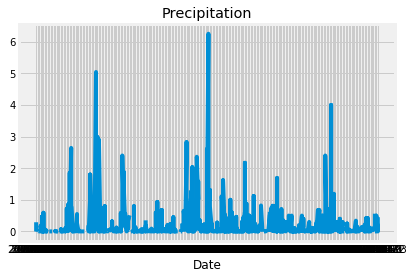

In [11]:
import datetime
import datedelta 

# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date).order_by(Measurement.date.desc())

# Calculate the date 1 year ago from the last data point in the database
year = datetime.date(2017,8,23)-datedelta.YEAR

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>='2017,8,23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results= pd.DataFrame(precipitation_scores, columns =['date','precipitation'])

# Sort the dataframe by date
sort_results = results.sort_values(by='date', ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(sort_results['date'], sort_results['precipitation'])
plt.title('Precipitation')
plt.xlabel('Date')
plt.show()

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

results.describe()

,precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
second_query = session.query(Measurement.station).distinct().count()
print(second_query)


9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = engine.execute(
    'select station, count(station)from measurement group by station order by count(station) desc').fetchall()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

lowest_temp = session.query(func.avg (Measurement.tobs), 
                            func.min(Measurement.tobs),
                             func.max(Measurement.tobs)).\
order_by(Measurement.station).all()

lowest_temp

[(73.09795396419437, 53.0, 87.0)]

In [ ]:
# Choose the station with the highest number of temperature observations.

station_temp = session.query(Measurement.station,
                             func.count(Measurement.tobs)).\
                    filter(Measurement.station).\
                    order_by(Measurement.station).all()



# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_obs = session.query(Measurement.tobs, Measurement.station).\
filter(Measurement.date>='precipitation_scores').\
filter(Measurement.station==active_stations).all()

plt.hist(temperature_obs, bins=12)
plt.ylabel('Frequency')
plt.legend('tobs', loc='upper right')
plt.show()

![precipitation](Images/station-histogram.png)

In [12]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
new_calc= calc_temps('2017-01-01','2018-01-01')
print(new_calc)


[(58.0, 74.14387974230493, 87.0)]


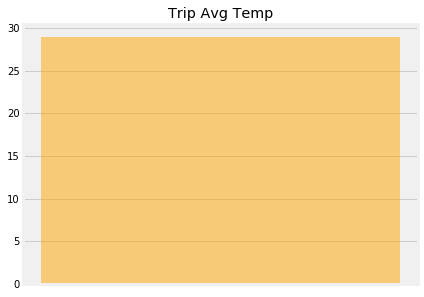

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x= 58.0
y=74.14
z=87.0
d= z-x
plt.bar(y,d, alpha = 0.5, color= 'orange')
plt.xticks(np.arange(1,1.0))
plt.tight_layout()
plt.title('Trip Avg Temp')
plt.show()

